In [95]:
from pathlib import Path
import os
import shutil
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt
import cv2
import json
%matplotlib inline
IMG_SIZE = 1280

In [96]:
img2iou = json.load(open('img2iou.json'))
ious = np.load('ious.npy')
mean_ious = np.load('mean_ious.npy')
counts = np.load('counts.npy')

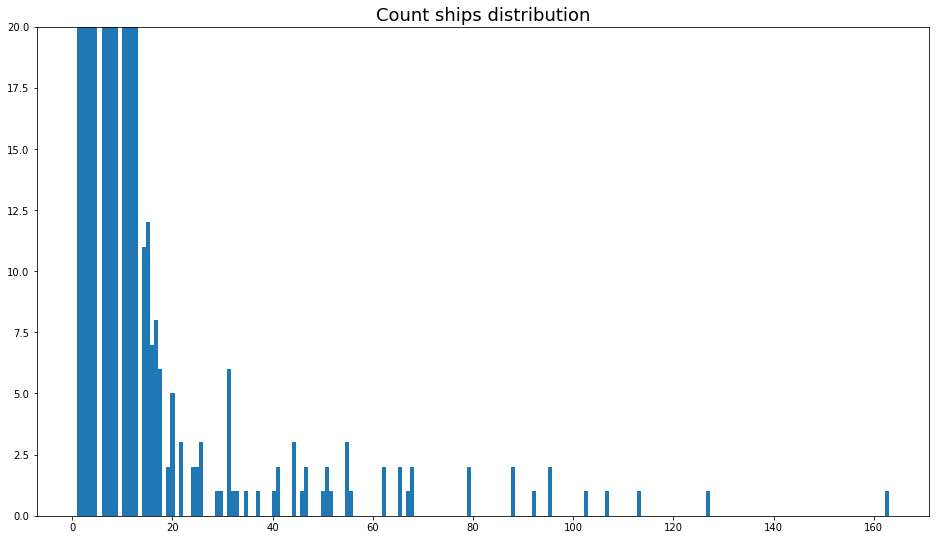

In [97]:
plt.figure(figsize=(16, 9))
plt.title('Count ships distribution', fontsize=18)
plt.hist(counts, bins=200)
plt.ylim(0, 20)
plt.show()

In [98]:
np.sum(counts > 5)

515

In [78]:
mean_ious[mean_ious != 0]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan])

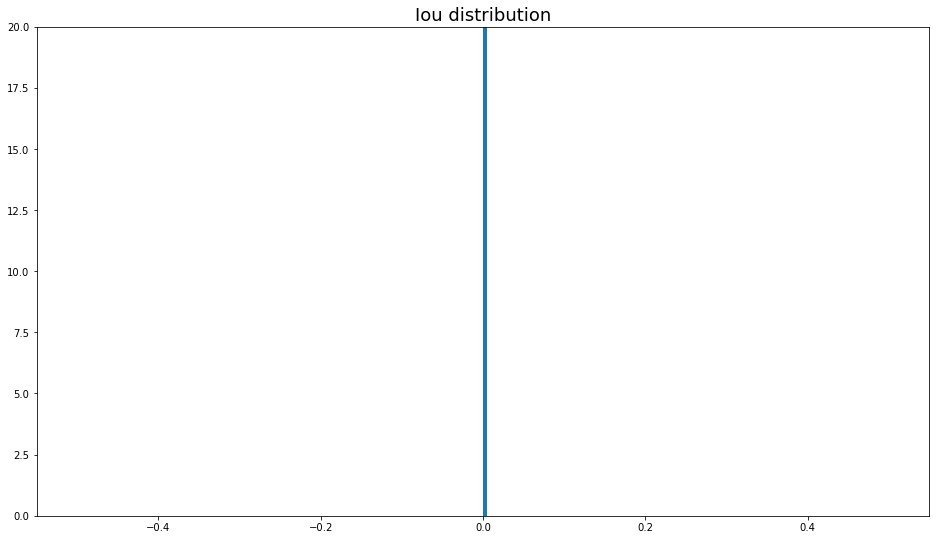

In [99]:
plt.figure(figsize=(16, 9))
plt.title('Iou distribution', fontsize=18)
plt.hist(mean_ious, bins=200)
plt.ylim(0, 20)
plt.show()

In [100]:
def draw_rectangles(img, annotations):
    for el in annotations:
        xc, yc, h, w = el[1:]
        x_left = int(IMG_SIZE * (xc - h / 2))
        y_left = int(IMG_SIZE * (yc - w / 2))
        x_right = int(IMG_SIZE * (xc + h / 2))
        y_right = int(IMG_SIZE * (yc + w / 2))
        img = cv2.rectangle(img, (x_left, y_left), (x_right, y_right), (1, 0, 0), 1)
    return img

In [101]:
def iou_transform(img2iou, threshold):
    res = []
    for key in img2iou:
        if img2iou[key]['iou'] > threshold:
            res.append(img2iou[key])
    return res

def iou_count_threashold(img2iou, lambda_threshold, lambda_counts):
    res = []
    for key in img2iou:
        el = img2iou[key]
        if lambda_threshold(el['iou']) and lambda_counts(len(el['annotattion'])):
        #if el['iou'] > threshold and len(el['annotattion']) == counts:
            res.append(img2iou[key])
        elif not lambda_counts(len(el['annotattion'])) and el['iou'] < 1e-3:
            res.append(img2iou[key])
    return res

In [106]:
# images = iou_transform(img2iou, 0.1)
images = iou_count_threashold(img2iou, lambda_threshold = lambda iou: iou < 0.01, lambda_counts = lambda counts: counts == 5)
len(images)

137

In [ ]:
image_names = []
tmp = iou_count_threashold(img2iou, lambda_threshold = lambda iou: iou <= 0.01, lambda_counts = lambda counts: counts <= 5)
image_names.append({
    'iou' : '<= 0.1', 
    'count' : '<= 5',
    'images': []
})

In [107]:
def show_image(images, idx):
    %matplotlib qt
    plt.figure(figsize=(16, 9))
    img = plt.imread(images[idx]['img_path'])
    draw_rectangles(img, images[idx]['annotattion'])
    plt.imshow(img, cmap='gray')
    path_to_img = Path(images[idx]['img_path'])
    orig_img_name = path_to_img.parent.name
    path_to_orig_img = Path('/home/max/datasets/HRSID_jpg/HRSID_JPG/data') / (orig_img_name + '.jpg') 
    
    print(f"{path_to_orig_img}")
    print(f"{orig_img_name}")
    print(f"IoU = {round(images[idx]['iou'], 3)}")  # МНОГО КОРАБЛЕЙ P0106_4200_5000_16200_17000

In [110]:
show_image(images, -1)

/home/max/datasets/HRSID_jpg/HRSID_JPG/data/P0015_0_800_8689_9489.jpg
P0015_0_800_8689_9489
IoU = 0.0


In [24]:
p = Path('/home/max/projects/dataset_v2/processing/ships_data_big/P0061_1200_2000_3600_4400/image.png')
p

PosixPath('/home/max/projects/dataset_v2/processing/ships_data_big/P0061_1200_2000_3600_4400/image.png')

In [25]:
p.parent

PosixPath('/home/max/projects/dataset_v2/processing/ships_data_big/P0061_1200_2000_3600_4400')